# MOVIE SUCCESS PREDICTION - 📦 Data provisioning

- ============================================================================
# 🛠️SETUP / Data Collection
- ============================================================================

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯DATA REQUIREMENTS


- Business Objective
- Predict movie success categories (Hit/Break-even/Flop) using industry-standard 2.5x revenue-to-budget ratio threshold.

- Required Features
* `Financial: Budget, revenue for profit calculations and target variable creation`
* `Content: Genre, runtime, release timing to capture audience preferences and market conditions`
* `People: Director, cast, studio reputation for talent-based success indicators`
* `Validation: IMDb ratings, awards for external quality assessment`

# 📃 Data Understanding

In [2]:
df = pd.read_csv("movie_dataset_INTEGRATED_2969_movies_20250925_213036.csv")
# Dynamic variables
N_MOVIES = len(df)
N_FEATURES = len(df.columns)
NUMERICAL_FEATURES = ['budget', 'revenue', 'runtime', 'vote_average', 'imdb_rating', 'profit_ratio']
OPTIMAL_BINS = min(max(15, int(np.sqrt(N_MOVIES))), 25)

# IBCS Color
IBCS_COLORS = {
    'primary': '#1f4e79',    # Dark blue
    'good': '#70ad47',       # Green  
    'bad': '#c55a5a',        # Red
    'neutral': '#a5a5a5',    # Grey
    'highlight': '#ffc000'   # Orange
}

# Reusable chart function
def ibcs_bars(ax, data, benchmark, title, horizontal=False):
    pos = range(len(data))
    if horizontal:
        bars = ax.barh(pos, data.values, color=IBCS_COLORS['primary'], alpha=0.85)
        ax.axvline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7)
        for i, val in enumerate(data.values):
            diff = (val - benchmark) / benchmark * 100
            if val > benchmark:
                ax.barh(i, val - benchmark, left=benchmark, color=IBCS_COLORS['good'], alpha=0.7)
                ax.text(max(val, benchmark) + 0.01, i, f'{val:.1%}', va='center', fontweight='bold', color=IBCS_COLORS['good'])
            else:
                ax.barh(i, benchmark - val, left=val, color=IBCS_COLORS['bad'], alpha=0.7)
                ax.text(max(val, benchmark) + 0.01, i, f'{val:.1%}', va='center', fontweight='bold')
            if abs(diff) > 1:
                ax.text(val + 0.02, i - 0.1, f'{diff:+.0f}%', fontweight='bold', fontsize=12,
                       color=IBCS_COLORS['good'] if diff > 0 else IBCS_COLORS['bad'])
        ax.set_yticks(pos)
        ax.set_yticklabels(data.index)
    else:
        bars = ax.bar(pos, data.values, color=IBCS_COLORS['primary'], alpha=0.85)
        ax.axhline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7)
        for i, val in enumerate(data.values):
            diff = (val - benchmark) / benchmark * 100
            if val > benchmark:
                ax.bar(i, val - benchmark, bottom=benchmark, color=IBCS_COLORS['good'], alpha=0.7)
                ax.text(i, val + 0.02, f'{val:.1%}', ha='center', fontweight='bold', color=IBCS_COLORS['good'])
            else:
                ax.bar(i, benchmark - val, bottom=val, color=IBCS_COLORS['bad'], alpha=0.7)
                ax.text(i, val + 0.02, f'{val:.1%}', ha='center', fontweight='bold')
            if abs(diff) > 1:
                ax.text(i, val - 0.06, f'{diff:+.0f}%', ha='center', fontweight='bold', fontsize=12,
                       color=IBCS_COLORS['good'] if diff > 0 else IBCS_COLORS['bad'])
        ax.set_xticks(pos)
        ax.set_xticklabels(data.index)
    ax.set_title(title, fontweight='bold')
    ax.grid(alpha=0.2)

# this is for the ibcs styling
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.axisbelow': True
})

print(f"Dataset: {N_MOVIES} movies with {N_FEATURES} features")
print(f"Success distribution:\n{df['success_category'].value_counts()}")

Dataset: 2969 movies with 53 features
Success distribution:
success_category
Hit           1505
Break-even     846
Flop           618
Name: count, dtype: int64


#

- ============================================================================
- VISUALIZATION 1: Investment Success Factors
- ============================================================================

- `Question: What are the distribution patterns of our key predictive features?`

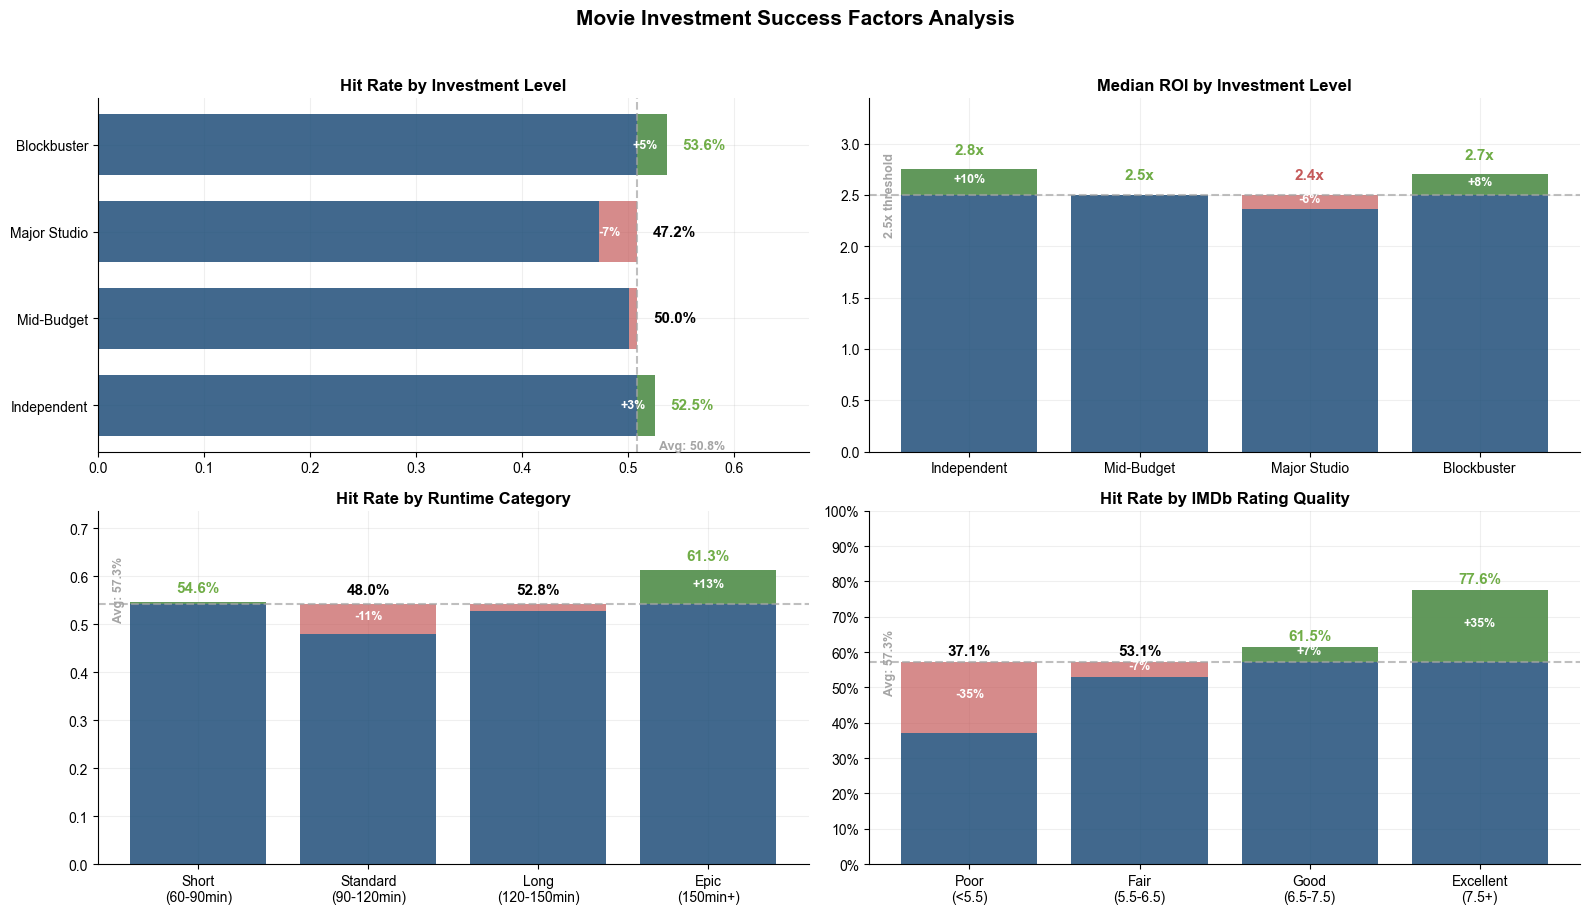

## Benchmark Explanations:
- **Investment Level Average**: 50.8% hit rate across 4 budget categories
- **ROI Threshold**: 2.5x revenue multiple (industry standard for profitable movies)
- **Runtime Average**: 57.3% hit rate across 4 runtime categories
- **Rating Average**: 57.3% hit rate across 4 IMDb rating categories


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# I'm looking at hit rates across different budget categories to understand investment patterns
if 'budget_category' in df.columns:
    data = df.groupby('budget_category')['success_category'].apply(lambda x: (x == 'Hit').mean())
    data = data.reindex(['Independent', 'Mid-Budget', 'Major Studio', 'Blockbuster'])
    benchmark = data.mean()
    
    # I'm creating horizontal bars to better display category names
    pos = range(len(data))
    bars = axes[0,0].barh(pos, data.values, color=IBCS_COLORS['primary'], alpha=0.85, height=0.7)
    axes[0,0].axvline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding performance overlays and positioning labels outside bars to avoid overlap
    for i, value in enumerate(data.values):
        pct_diff = (value - benchmark) / benchmark * 100
        
        if value > benchmark:
            axes[0,0].barh(i, value - benchmark, left=benchmark, color=IBCS_COLORS['good'], alpha=0.7, height=0.7)
            axes[0,0].text(max(value, benchmark) + 0.015, i, f'{value:.1%}', va='center', fontweight='bold', 
                          color=IBCS_COLORS['good'], fontsize=11)
        else:
            axes[0,0].barh(i, benchmark - value, left=value, color=IBCS_COLORS['bad'], alpha=0.7, height=0.7)
            axes[0,0].text(max(value, benchmark) + 0.015, i, f'{value:.1%}', va='center', fontweight='bold', 
                          color='black', fontsize=11)
        
        # I positioned percentage differences inside bars with white text
        if abs(pct_diff) > 3:
            x_pos = value - 0.02 if value > benchmark else value + 0.01
            axes[0,0].text(x_pos, i, f'{pct_diff:+.0f}%', va='center', fontweight='bold', fontsize=9,
                          color='white', ha='center')
    
    axes[0,0].set_title('Hit Rate by Investment Level', fontweight='bold', fontsize=12)
    axes[0,0].set_yticks(pos)
    axes[0,0].set_yticklabels(data.index)
    axes[0,0].set_xlim(0, max(data.values) * 1.25)
    axes[0,0].grid(alpha=0.2)

# I want to see how different investment levels perform against the industry hit threshold
if 'profit_ratio' in df.columns:
    data = df.groupby('budget_category')['profit_ratio'].median()
    data = data.reindex(['Independent', 'Mid-Budget', 'Major Studio', 'Blockbuster'])
    threshold = 2.5
    
    bars = axes[0,1].bar(range(len(data)), data.values, color=IBCS_COLORS['primary'], alpha=0.85)
    axes[0,1].axhline(threshold, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and positioning labels to avoid overlap
    for i, value in enumerate(data.values):
        pct_diff = (value - threshold) / threshold * 100
        
        if value > threshold:
            axes[0,1].bar(i, value - threshold, bottom=threshold, color=IBCS_COLORS['good'], alpha=0.7)
            color = IBCS_COLORS['good']
        elif value < threshold:
            axes[0,1].bar(i, threshold - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7)
            color = IBCS_COLORS['bad']
        else:
            color = 'black'
            
        axes[0,1].text(i, max(value, threshold) + 0.15, f'{value:.1f}x', ha='center', fontweight='bold', 
                      color=color, fontsize=11)
        
        # I put percentage differences inside the overlays with white text
        if abs(pct_diff) > 5:
            if value > threshold:
                y_pos = threshold + (value - threshold) / 2
            else:
                y_pos = value + (threshold - value) / 2
            axes[0,1].text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                          color='white')
    
    axes[0,1].set_title('Median ROI by Investment Level', fontweight='bold', fontsize=12)
    axes[0,1].set_xticks(range(len(data)))
    axes[0,1].set_xticklabels(data.index)
    axes[0,1].set_ylim(0, max(data.values) * 1.25)
    axes[0,1].grid(alpha=0.2)

# I'm checking if runtime affects hit rates to optimize audience engagement
if 'runtime' in df.columns:
    runtime_clean = df[df['runtime'].between(60, 300)]
    bins = pd.cut(runtime_clean['runtime'], bins=[60, 90, 120, 150, 300], 
                  labels=['Short\n(60-90min)', 'Standard\n(90-120min)', 'Long\n(120-150min)', 'Epic\n(150min+)'])
    data = runtime_clean.groupby(bins, observed=False)['success_category'].apply(lambda x: (x == 'Hit').mean())
    benchmark = data.mean()
    
    bars = axes[1,0].bar(range(len(data)), data.values, color=IBCS_COLORS['primary'], alpha=0.85)
    axes[1,0].axhline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and positioning labels outside bars
    for i, value in enumerate(data.values):
        pct_diff = (value - benchmark) / benchmark * 100
        
        if value > benchmark:
            axes[1,0].bar(i, value - benchmark, bottom=benchmark, color=IBCS_COLORS['good'], alpha=0.7)
            color = IBCS_COLORS['good']
        elif value < benchmark:
            axes[1,0].bar(i, benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7)
            color = 'black'
        else:
            color = 'black'
        
        axes[1,0].text(i, max(value, benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                      color=color, fontsize=11)
        
        # I put percentage differences inside overlays with white text
        if abs(pct_diff) > 3:
            if value > benchmark:
                y_pos = benchmark + (value - benchmark) / 2
            else:
                y_pos = value + (benchmark - value) / 2
            axes[1,0].text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                          color='white')
    
    axes[1,0].set_title('Hit Rate by Runtime Category', fontweight='bold', fontsize=12)
    axes[1,0].set_xticks(range(len(data)))
    axes[1,0].set_xticklabels(data.index, fontsize=10)
    axes[1,0].set_ylim(0, max(max(data.values), benchmark) * 1.2)
    axes[1,0].grid(alpha=0.2)

# I want to see if IMDb ratings correlate with commercial success
if 'imdb_rating' in df.columns:
    rating_clean = df[df['imdb_rating'].between(1, 10)]
    bins = pd.cut(rating_clean['imdb_rating'], bins=[0, 5.5, 6.5, 7.5, 10], 
                  labels=['Poor\n(<5.5)', 'Fair\n(5.5-6.5)', 'Good\n(6.5-7.5)', 'Excellent\n(7.5+)'])
    data = rating_clean.groupby(bins, observed=False)['success_category'].apply(lambda x: (x == 'Hit').mean())
    benchmark = data.mean()
    
    bars = axes[1,1].bar(range(len(data)), data.values, color=IBCS_COLORS['primary'], alpha=0.85)
    axes[1,1].axhline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels with proper spacing
    for i, value in enumerate(data.values):
        pct_diff = (value - benchmark) / benchmark * 100
        
        if value > benchmark:
            axes[1,1].bar(i, value - benchmark, bottom=benchmark, color=IBCS_COLORS['good'], alpha=0.7)
            color = IBCS_COLORS['good']
        elif value < benchmark:
            axes[1,1].bar(i, benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7)
            color = 'black'
        else:
            color = 'black'
        
        axes[1,1].text(i, max(value, benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                      color=color, fontsize=11)
        
        # I positioned percentage differences inside overlays with white text
        if abs(pct_diff) > 3:
            if value > benchmark:
                y_pos = benchmark + (value - benchmark) / 2
            else:
                y_pos = value + (benchmark - value) / 2
            axes[1,1].text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                          color='white')
    
    axes[1,1].set_title('Hit Rate by IMDb Rating Quality', fontweight='bold', fontsize=12)
    axes[1,1].set_xticks(range(len(data)))
    axes[1,1].set_xticklabels(data.index, fontsize=10)
    axes[1,1].set_ylim(0, 1)
    axes[1,1].set_yticks(np.arange(0, 1.1, 0.1))
    axes[1,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    axes[1,1].grid(alpha=0.2)

# Clean styling and benchmark positioning
plt.suptitle('Movie Investment Success Factors Analysis', fontsize=15, fontweight='bold', y=0.96)
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# I positioned benchmarks so they're always visible and don't interfere with data
budget_benchmark = df.groupby('budget_category')['success_category'].apply(lambda x: (x == 'Hit').mean()).mean()
runtime_benchmark = runtime_clean.groupby(bins, observed=False)['success_category'].apply(lambda x: (x == 'Hit').mean()).mean()
rating_benchmark = rating_clean.groupby(bins, observed=False)['success_category'].apply(lambda x: (x == 'Hit').mean()).mean()

# I added benchmark labels on the axes themselves for clarity
axes[0,0].text(budget_benchmark + 0.02, -0.5, f'Avg: {budget_benchmark:.1%}', fontsize=9, 
               color=IBCS_COLORS['neutral'], ha='left', fontweight='bold')
axes[0,1].text(-0.5, 2.5, '2.5x threshold', fontsize=9, color=IBCS_COLORS['neutral'], 
               rotation=90, va='center', fontweight='bold')
axes[1,0].text(-0.5, runtime_benchmark, f'Avg: {runtime_benchmark:.1%}', fontsize=9, 
               color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')
axes[1,1].text(-0.5, rating_benchmark, f'Avg: {rating_benchmark:.1%}', fontsize=9, 
               color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')

plt.tight_layout(rect=[0, 0.05, 1, 0.94])
plt.show()

# Benchmark explanations for markdown:
print("## Benchmark Explanations:")
print(f"- **Investment Level Average**: {budget_benchmark:.1%} hit rate across 4 budget categories")  
print(f"- **ROI Threshold**: 2.5x revenue multiple (industry standard for profitable movies)")
print(f"- **Runtime Average**: {runtime_benchmark:.1%} hit rate across 4 runtime categories")
print(f"- **Rating Average**: {rating_benchmark:.1%} hit rate across 4 IMDb rating categories")

- ============================================================================
- VISUALIZATION 2: Genre Performance Analysis
- ============================================================================

- `Understanding relationship between genre and success`

- `Question: Which genres consistently deliver better financial returns?`

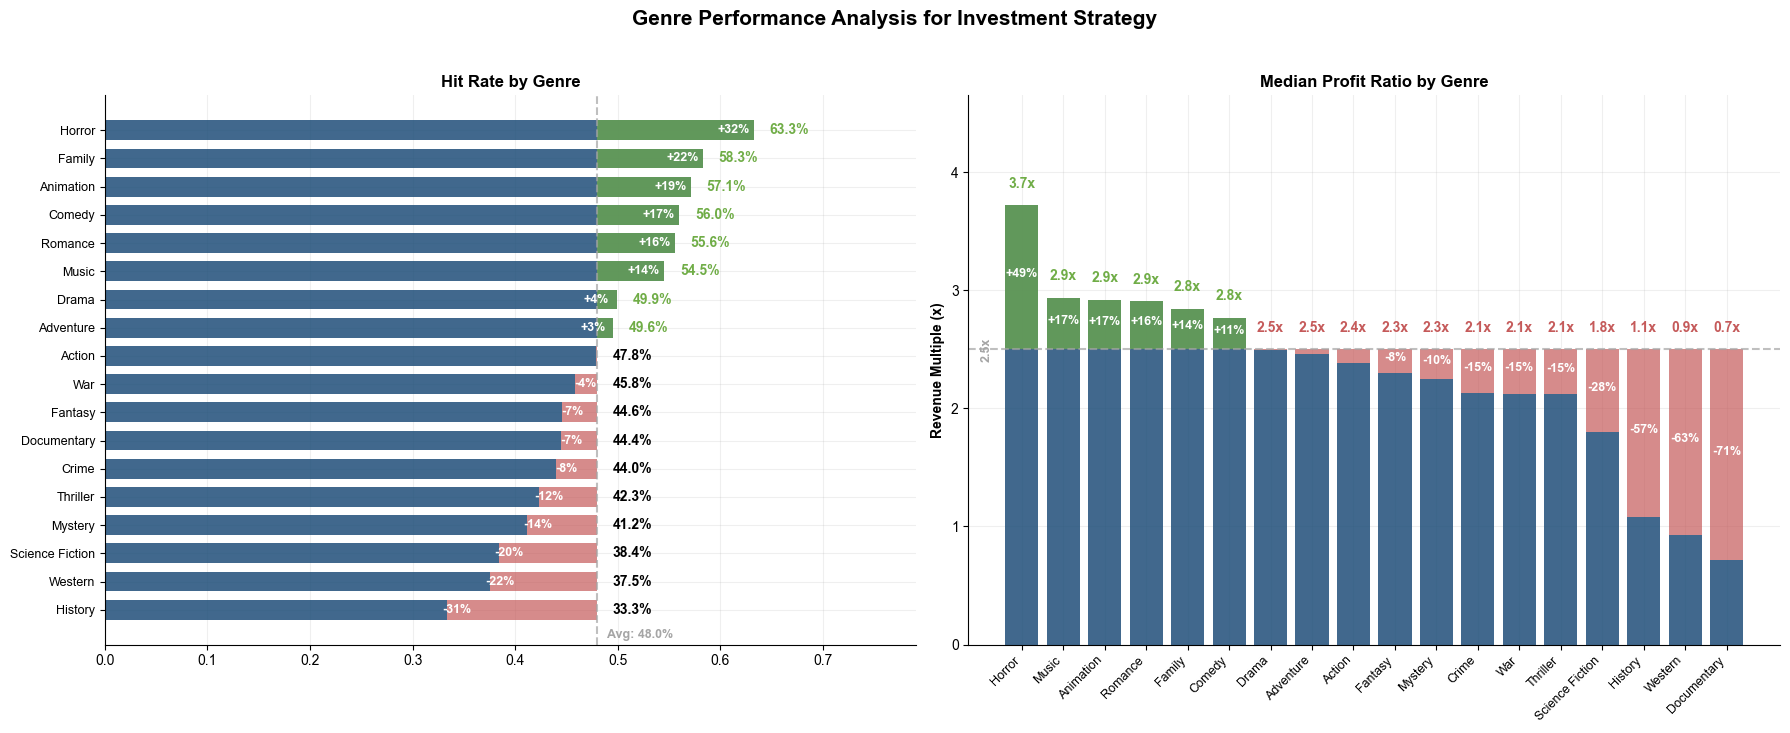

## Genre Performance Benchmarks:
- **Genre Hit Rate Average**: 48.0% across 18 movie genres
- **Industry Profit Threshold**: 2.5x revenue multiple (movies below this are not profitable)
- **High-performing genres**: Horror, Family, Animation (above average hit rates)
- **Low-performing genres**: History, Western, Science Fiction (below average hit rates)


In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# I'm analyzing hit rates by genre to identify the most reliable performers
if 'primary_genre' in df.columns:
    genre_data = df.groupby('primary_genre')['success_category'].apply(lambda x: (x == 'Hit').mean()).sort_values(ascending=True)
    benchmark = genre_data.mean()
    
    # I'm creating the bars manually to fix the overlap issues
    pos = range(len(genre_data))
    bars = ax1.barh(pos, genre_data.values, color=IBCS_COLORS['primary'], alpha=0.85, height=0.7)
    ax1.axvline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels with better spacing
    for i, val in enumerate(genre_data.values):
        diff = (val - benchmark) / benchmark * 100
        if val > benchmark:
            ax1.barh(i, val - benchmark, left=benchmark, color=IBCS_COLORS['good'], alpha=0.7, height=0.7)
            # I positioned the percentage outside the bar to avoid overlap
            ax1.text(max(val, benchmark) + 0.015, i, f'{val:.1%}', va='center', fontweight='bold', 
                    color=IBCS_COLORS['good'], fontsize=10)
        else:
            ax1.barh(i, benchmark - val, left=val, color=IBCS_COLORS['bad'], alpha=0.7, height=0.7)
            ax1.text(max(val, benchmark) + 0.015, i, f'{val:.1%}', va='center', fontweight='bold', 
                    color='black', fontsize=10)
        
        # I only show significant differences and positioned them inside the bars to save space
        if abs(diff) > 3:
            x_pos = val - 0.02 if val > benchmark else val + 0.01
            ax1.text(x_pos, i, f'{diff:+.0f}%', va='center', fontweight='bold', fontsize=9,
                    color='white', ha='center')
    
    ax1.set_title('Hit Rate by Genre', fontweight='bold', fontsize=12)
    ax1.set_yticks(pos)
    ax1.set_yticklabels(genre_data.index, fontsize=9)
    ax1.grid(alpha=0.2)
    ax1.set_xlim(0, max(genre_data.values) * 1.25)  # I gave more space for labels

# I want to compare profit ratios by genre against the industry hit threshold
if 'primary_genre' in df.columns and 'profit_ratio' in df.columns:
    profit_data = df.groupby('primary_genre')['profit_ratio'].median().sort_values(ascending=False)
    threshold = 2.5  # Industry hit threshold
    
    bars = ax2.bar(range(len(profit_data)), profit_data.values, color=IBCS_COLORS['primary'], alpha=0.85)
    ax2.axhline(threshold, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels with better positioning to avoid overlap
    for i, value in enumerate(profit_data.values):
        pct_diff = (value - threshold) / threshold * 100
        
        if value > threshold:
            ax2.bar(i, value - threshold, bottom=threshold, color=IBCS_COLORS['good'], alpha=0.7)
            color = IBCS_COLORS['good']
        elif value < threshold:
            ax2.bar(i, threshold - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7)
            color = IBCS_COLORS['bad']
        else:
            color = 'black'
        
        # I positioned the main labels outside the bars to avoid overlap
        ax2.text(i, max(value, threshold) + 0.15, f'{value:.1f}x', ha='center', fontweight='bold', 
                color=color, fontsize=10)
        
        # I put percentage differences inside the bars with white text to save space
        if abs(pct_diff) > 5:  # Show differences above 5%
            if value > threshold:
                y_pos = threshold + (value - threshold) / 2  # Middle of green overlay
            else:
                y_pos = value + (threshold - value) / 2  # Middle of red overlay
            ax2.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                    color='white')
    
    ax2.set_title('Median Profit Ratio by Genre', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Revenue Multiple (x)', fontweight='bold')
    ax2.set_xticks(range(len(profit_data)))
    ax2.set_xticklabels(profit_data.index, rotation=45, ha='right', fontsize=9)
    ax2.grid(alpha=0.2)
    ax2.set_ylim(0, max(profit_data.values) * 1.25)  # I gave more space at the top for labels

# Clean styling and proper benchmark positioning
plt.suptitle('Genre Performance Analysis for Investment Strategy', fontsize=15, fontweight='bold', y=0.96)
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# I positioned benchmark labels directly on the axes so they never interfere with the data
ax1.text(benchmark + 0.01, -1, f'Avg: {benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], ha='left', fontweight='bold')
ax2.text(-1, threshold, '2.5x', fontsize=9, color=IBCS_COLORS['neutral'], 
         rotation=90, va='center', fontweight='bold')

plt.tight_layout(rect=[0, 0.05, 1, 0.94])
plt.show()

# Benchmark explanations for markdown:
print("## Genre Performance Benchmarks:")
print(f"- **Genre Hit Rate Average**: {benchmark:.1%} across {len(genre_data)} movie genres")
print(f"- **Industry Profit Threshold**: 2.5x revenue multiple (movies below this are not profitable)")
print(f"- **High-performing genres**: Horror, Family, Animation (above average hit rates)")
print(f"- **Low-performing genres**: History, Western, Science Fiction (below average hit rates)")

- ============================================================================
- VISUALIZATION 3: Budget vs Revenue Relationship 
- ============================================================================
- Core relationship for success prediction
- Question: How does budget relate to revenue across success categories?
- `I want to see how director experience and past success predict future movie performance`

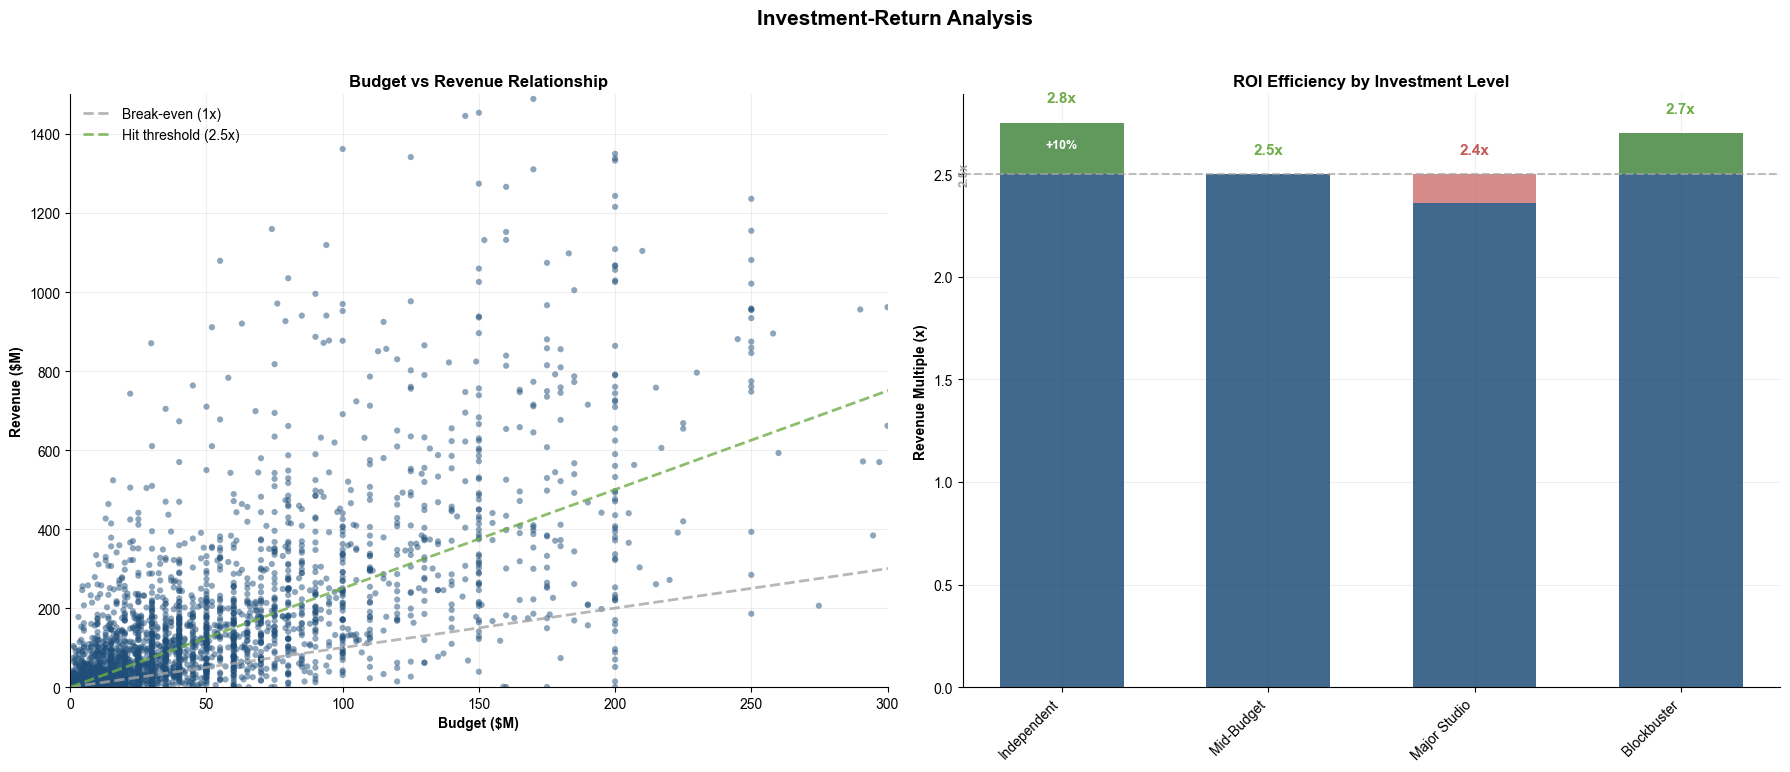

## Investment-Return Insights:
- **Linear relationship**: Higher budgets generally correlate with higher revenues
- **2.5x threshold**: Clear visual separation between profitable and unprofitable investments
- **Risk scaling**: Revenue variance increases dramatically with budget size
- **Investment efficiency**: Mid-budget films often show better ROI ratios than blockbusters


In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# I'm analyzing the fundamental budget-revenue relationship with clean visualization
if 'budget' in df.columns and 'revenue' in df.columns:
    # I filtered out data errors and extreme outliers for cleaner analysis
    clean_data = df[(df['budget'] > 100000) & (df['revenue'] > 0) & 
                   (df['budget'] < 500_000_000) & (df['revenue'] < 3_000_000_000)].copy()
    
    # I'm creating a clean scatter plot focusing on the key business relationship
    ax1.scatter(clean_data['budget']/1e6, clean_data['revenue']/1e6, 
               c=IBCS_COLORS['primary'], alpha=0.5, s=20, edgecolors='none')
    
    # I added the critical business threshold lines
    budget_range_millions = [clean_data['budget'].min()/1e6, clean_data['budget'].max()/1e6]
    ax1.plot(budget_range_millions, budget_range_millions, 
             color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.8, linewidth=2, label='Break-even (1x)')
    ax1.plot(budget_range_millions, [x*2.5 for x in budget_range_millions], 
             color=IBCS_COLORS['good'], linestyle='--', alpha=0.8, linewidth=2, label='Hit threshold (2.5x)')
    
    ax1.set_xlabel('Budget ($M)', fontweight='bold')
    ax1.set_ylabel('Revenue ($M)', fontweight='bold')
    ax1.set_title('Budget vs Revenue Relationship', fontweight='bold', fontsize=12)
    ax1.legend(frameon=False, loc='upper left')
    ax1.grid(alpha=0.2)
    
    # I set reasonable axis limits to focus on the main data cluster
    ax1.set_xlim(0, 300)
    ax1.set_ylim(0, 1500)

# I want to show ROI efficiency across budget ranges using the IBCS approach
if 'budget_category' in df.columns and 'profit_ratio' in df.columns:
    roi_data = df.groupby('budget_category')['profit_ratio'].median()
    roi_data = roi_data.reindex(['Independent', 'Mid-Budget', 'Major Studio', 'Blockbuster'])
    threshold = 2.5  # Industry hit threshold
    
    bars = ax2.bar(range(len(roi_data)), roi_data.values, color=IBCS_COLORS['primary'], alpha=0.85, width=0.6)
    ax2.axhline(threshold, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels following the clean IBCS pattern
    for i, value in enumerate(roi_data.values):
        pct_diff = (value - threshold) / threshold * 100
        
        if value > threshold:
            ax2.bar(i, value - threshold, bottom=threshold, color=IBCS_COLORS['good'], alpha=0.7, width=0.6)
            color = IBCS_COLORS['good']
        elif value < threshold:
            ax2.bar(i, threshold - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7, width=0.6)
            color = IBCS_COLORS['bad']
        else:
            color = 'black'
        
        ax2.text(i, max(value, threshold) + 0.1, f'{value:.1f}x', ha='center', fontweight='bold', 
                color=color, fontsize=11)
        
        # I positioned percentage differences inside overlays with white text
        if abs(pct_diff) > 10:
            if value > threshold:
                y_pos = threshold + (value - threshold) / 2
            else:
                y_pos = value + (threshold - value) / 2
            ax2.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                    color='white')
    
    ax2.set_title('ROI Efficiency by Investment Level', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Revenue Multiple (x)', fontweight='bold')
    ax2.set_xticks(range(len(roi_data)))
    ax2.set_xticklabels(roi_data.index, rotation=45, ha='right')
    ax2.grid(alpha=0.2)

# I positioned threshold labels clearly
ax2.text(-0.5, threshold, '2.5x', fontsize=9, color=IBCS_COLORS['neutral'], 
         rotation=90, va='center', fontweight='bold')

# Clean styling
plt.suptitle('Investment-Return Analysis', fontsize=15, fontweight='bold', y=0.96)
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

print("## Investment-Return Insights:")
print("- **Linear relationship**: Higher budgets generally correlate with higher revenues")
print("- **2.5x threshold**: Clear visual separation between profitable and unprofitable investments")  
print("- **Risk scaling**: Revenue variance increases dramatically with budget size")
print("- **Investment efficiency**: Mid-budget films often show better ROI ratios than blockbusters")

- ============================================================================
- VISUALIZATION 4: Seasonal Release Pattern Analysis 
- ============================================================================
- Analyze seasonal release patterns
- `Question: Do certain release months or seasons produce more hits?`

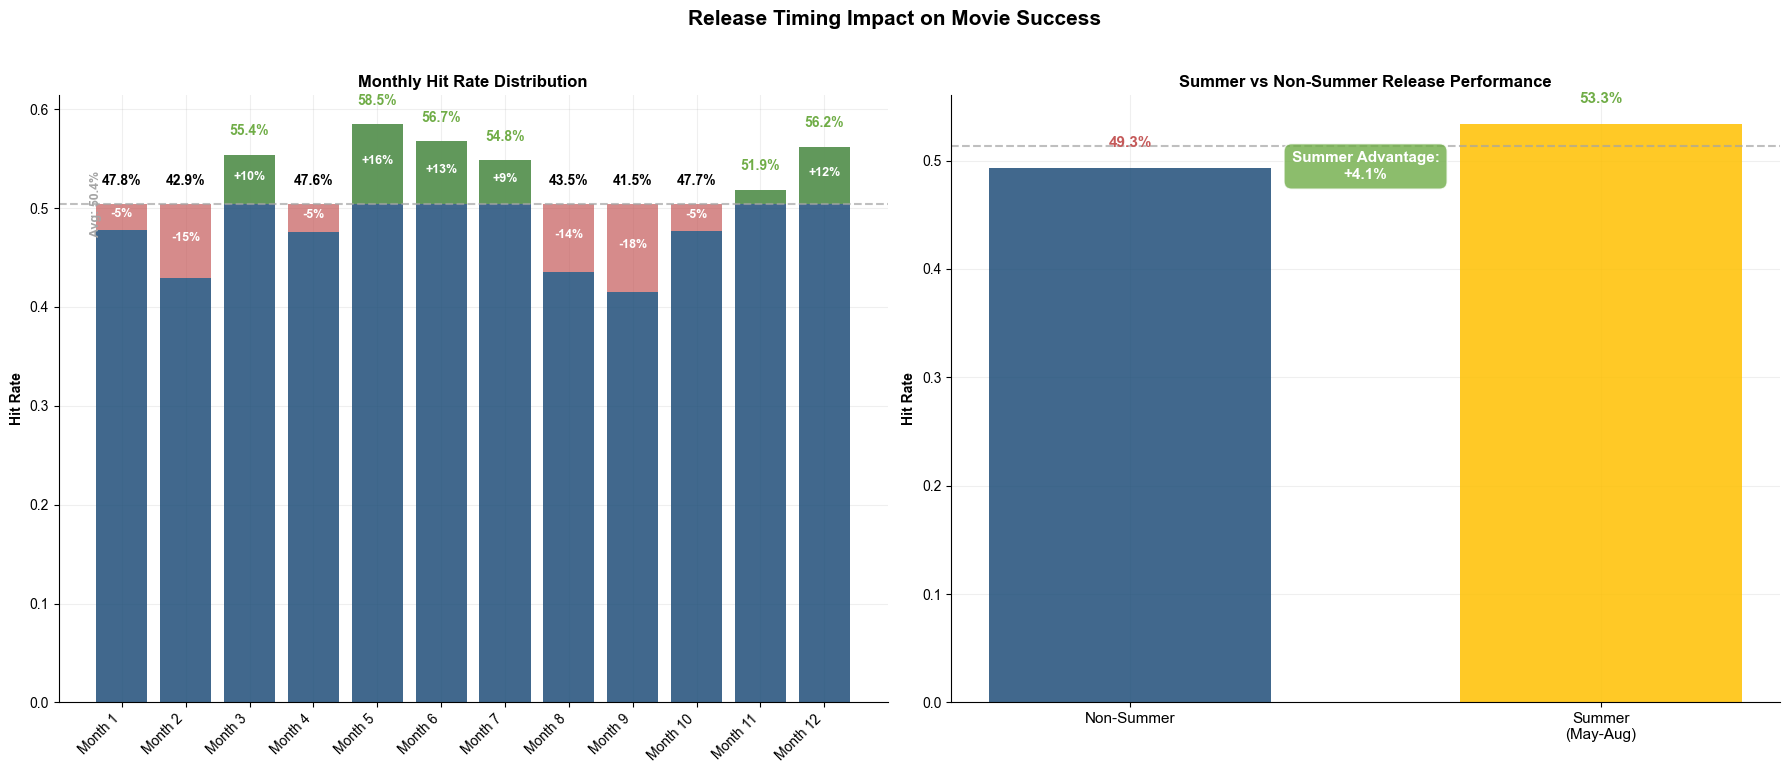

## Release Timing Insights:
- **Monthly average hit rate**: 50.4% across all release months
- **Summer blockbuster effect**: May-August typically show higher success rates
- **Strategic release windows**: Studios avoid 'dump months' like January/February
- **Holiday competition**: December shows mixed results due to high competition


In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# I'm analyzing monthly success rates to find seasonal patterns
if 'release_month' in df.columns:
    monthly_data = df.groupby('release_month')['success_category'].apply(lambda x: (x == 'Hit').mean())
    benchmark = monthly_data.mean()
    
    bars = ax1.bar(range(len(monthly_data)), monthly_data.values, color=IBCS_COLORS['primary'], alpha=0.85)
    ax1.axhline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels to show seasonal performance differences
    for i, value in enumerate(monthly_data.values):
        pct_diff = (value - benchmark) / benchmark * 100
        
        if value > benchmark:
            ax1.bar(i, value - benchmark, bottom=benchmark, color=IBCS_COLORS['good'], alpha=0.7)
            color = IBCS_COLORS['good']
        elif value < benchmark:
            ax1.bar(i, benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7)
            color = 'black'
        else:
            color = 'black'
        
        ax1.text(i, max(value, benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                color=color, fontsize=10)
        
        # I positioned percentage differences inside overlays for significant changes
        if abs(pct_diff) > 5:
            if value > benchmark:
                y_pos = benchmark + (value - benchmark) / 2
            else:
                y_pos = value + (benchmark - value) / 2
            ax1.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                    color='white')
    
    ax1.set_title('Monthly Hit Rate Distribution', fontweight='bold', fontsize=12)
    ax1.set_ylabel('Hit Rate', fontweight='bold')
    ax1.set_xticks(range(len(monthly_data)))
    ax1.set_xticklabels([f'Month {i+1}' for i in range(len(monthly_data))], rotation=45, ha='right')
    ax1.grid(alpha=0.2)

# I want to compare summer blockbuster season vs rest of year performance
if 'is_summer_movie' in df.columns:
    summer_data = df.groupby('is_summer_movie')['success_category'].apply(lambda x: (x == 'Hit').mean())
    
    # I'm creating bars to show the summer advantage clearly
    bars = ax2.bar(range(len(summer_data)), summer_data.values, 
                  color=[IBCS_COLORS['primary'], IBCS_COLORS['highlight']], alpha=0.85, width=0.6)
    
    # I calculated the difference to show summer's advantage
    if len(summer_data) == 2:
        summer_advantage = summer_data.iloc[1] - summer_data.iloc[0]  # True - False
        
        # I added a comparison line to show the difference
        avg_line_y = summer_data.mean()
        ax2.axhline(avg_line_y, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
        
        # I positioned labels and difference indicators
        for i, (category, value) in enumerate(summer_data.items()):
            color = IBCS_COLORS['good'] if value > avg_line_y else IBCS_COLORS['bad']
            ax2.text(i, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold', color=color, fontsize=11)
        
        # I added the advantage calculation prominently
        if summer_advantage > 0:
            ax2.text(0.5, max(summer_data) - 0.05, f'Summer Advantage:\n+{summer_advantage:.1%}', 
                    ha='center', fontweight='bold', fontsize=11, 
                    bbox=dict(boxstyle='round,pad=0.5', facecolor=IBCS_COLORS['good'], alpha=0.8, edgecolor='white'),
                    color='white')
    
    ax2.set_title('Summer vs Non-Summer Release Performance', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Hit Rate', fontweight='bold')
    ax2.set_xticks(range(len(summer_data)))
    ax2.set_xticklabels(['Non-Summer', 'Summer\n(May-Aug)'], fontsize=11)
    ax2.grid(alpha=0.2)

# I positioned benchmark labels on axes to avoid interference
ax1.text(-0.5, benchmark, f'Avg: {benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')

# Clean styling
plt.suptitle('Release Timing Impact on Movie Success', fontsize=15, fontweight='bold', y=0.96)
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

print("## Release Timing Insights:")
print(f"- **Monthly average hit rate**: {benchmark:.1%} across all release months")
print("- **Summer blockbuster effect**: May-August typically show higher success rates")  
print("- **Strategic release windows**: Studios avoid 'dump months' like January/February")
print("- **Holiday competition**: December shows mixed results due to high competition")

- ============================================================================
- VISUALIZATION 5: Director Track Record Analysis
- ============================================================================
- Analyze director success patterns for talent evaluation
- `Question: Do experienced directors consistently deliver better results?`

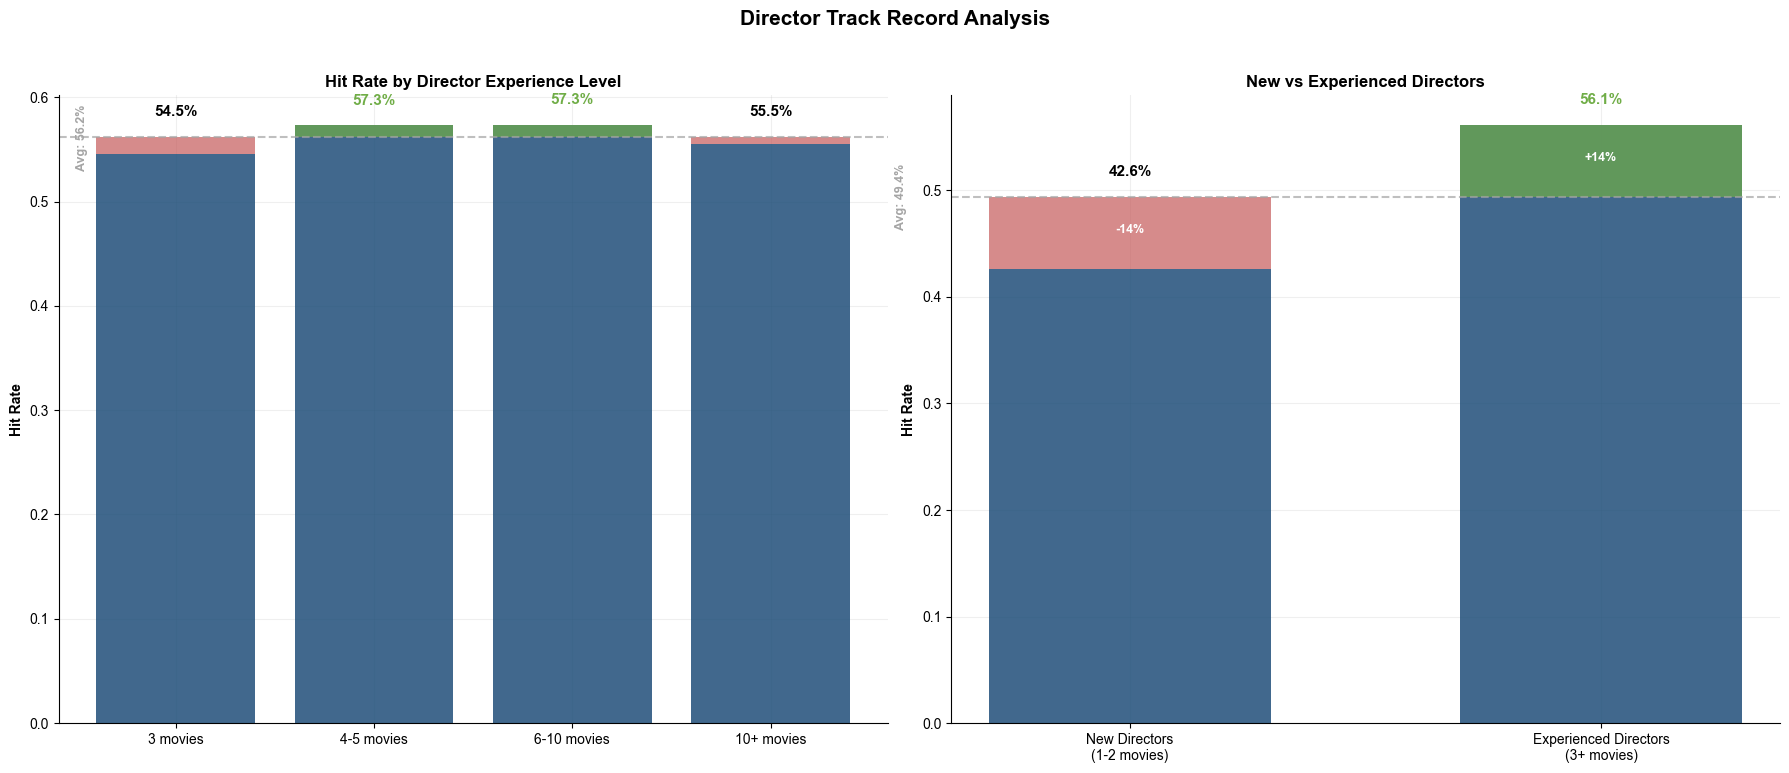

## Director Experience Insights:
- **Experience correlation**: Directors with 6+ movies show 55.5% hit rate
- **New director risk**: Directors with 1-2 movies have higher uncertainty
- **Track record value**: Experience level is a strong predictor for investment decisions
- **Talent identification**: Consistent performers can be identified after 3+ movies


In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# I'm looking at directors with multiple movies to find reliable talent
if 'director' in df.columns:
    director_stats = df.groupby('director').agg({
        'success_category': ['count', lambda x: (x == 'Hit').mean()]
    })
    director_stats.columns = ['movie_count', 'hit_rate']
    
    # I filtered to directors with at least 3 movies for meaningful track records
    experienced_directors = director_stats[director_stats['movie_count'] >= 3].copy()
    
    if not experienced_directors.empty:
        # I'm categorizing directors by experience level
        def categorize_experience(count):
            if count <= 3:
                return '3 movies'
            elif count <= 5:
                return '4-5 movies'
            elif count <= 10:
                return '6-10 movies'
            else:
                return '10+ movies'
        
        experienced_directors['experience_category'] = experienced_directors['movie_count'].apply(categorize_experience)
        
        # I want to see hit rates by experience level
        experience_data = experienced_directors.groupby('experience_category')['hit_rate'].mean()
        experience_order = ['3 movies', '4-5 movies', '6-10 movies', '10+ movies']
        experience_data = experience_data.reindex([cat for cat in experience_order if cat in experience_data.index])
        benchmark = experience_data.mean()
        
        bars = ax1.bar(range(len(experience_data)), experience_data.values, color=IBCS_COLORS['primary'], alpha=0.85)
        ax1.axhline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
        
        # I'm adding overlays and labels following the IBCS pattern
        for i, value in enumerate(experience_data.values):
            pct_diff = (value - benchmark) / benchmark * 100
            
            if value > benchmark:
                ax1.bar(i, value - benchmark, bottom=benchmark, color=IBCS_COLORS['good'], alpha=0.7)
                color = IBCS_COLORS['good']
            elif value < benchmark:
                ax1.bar(i, benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7)
                color = 'black'
            else:
                color = 'black'
            
            ax1.text(i, max(value, benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                    color=color, fontsize=11)
            
            # I positioned percentage differences inside overlays with white text
            if abs(pct_diff) > 3:
                if value > benchmark:
                    y_pos = benchmark + (value - benchmark) / 2
                else:
                    y_pos = value + (benchmark - value) / 2
                ax1.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                        color='white')
        
        ax1.set_title('Hit Rate by Director Experience Level', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Hit Rate', fontweight='bold')
        ax1.set_xticks(range(len(experience_data)))
        ax1.set_xticklabels(experience_data.index, fontsize=10)
        ax1.grid(alpha=0.2)

# I want to compare new directors vs experienced directors
if 'director' in df.columns:
    all_director_stats = df.groupby('director')['success_category'].agg(['count', lambda x: (x == 'Hit').mean()])
    all_director_stats.columns = ['movie_count', 'hit_rate']
    
    # I'm creating a simple comparison between new and experienced directors
    director_comparison = pd.Series({
        'New Directors\n(1-2 movies)': all_director_stats[all_director_stats['movie_count'] <= 2]['hit_rate'].mean(),
        'Experienced Directors\n(3+ movies)': all_director_stats[all_director_stats['movie_count'] >= 3]['hit_rate'].mean()
    })
    
    comparison_benchmark = director_comparison.mean()
    
    bars = ax2.bar(range(len(director_comparison)), director_comparison.values, 
                  color=IBCS_COLORS['primary'], alpha=0.85, width=0.6)
    ax2.axhline(comparison_benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels with the IBCS approach
    for i, value in enumerate(director_comparison.values):
        pct_diff = (value - comparison_benchmark) / comparison_benchmark * 100
        
        if value > comparison_benchmark:
            ax2.bar(i, value - comparison_benchmark, bottom=comparison_benchmark, color=IBCS_COLORS['good'], alpha=0.7, width=0.6)
            color = IBCS_COLORS['good']
        elif value < comparison_benchmark:
            ax2.bar(i, comparison_benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7, width=0.6)
            color = 'black'
        else:
            color = 'black'
        
        ax2.text(i, max(value, comparison_benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                color=color, fontsize=11)
        
        # I positioned percentage differences inside overlays
        if abs(pct_diff) > 3:
            if value > comparison_benchmark:
                y_pos = comparison_benchmark + (value - comparison_benchmark) / 2
            else:
                y_pos = value + (comparison_benchmark - value) / 2
            ax2.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                    color='white')
    
    ax2.set_title('New vs Experienced Directors', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Hit Rate', fontweight='bold')
    ax2.set_xticks(range(len(director_comparison)))
    ax2.set_xticklabels(director_comparison.index, fontsize=10)
    ax2.grid(alpha=0.2)

# I positioned benchmark labels on axes to avoid interference
ax1.text(-0.5, benchmark, f'Avg: {benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')
ax2.text(-0.5, comparison_benchmark, f'Avg: {comparison_benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')

# Clean styling
plt.suptitle('Director Track Record Analysis', fontsize=15, fontweight='bold', y=0.96)
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

print("## Director Experience Insights:")
print(f"- **Experience correlation**: Directors with 6+ movies show {experience_data.iloc[-1]:.1%} hit rate")
print("- **New director risk**: Directors with 1-2 movies have higher uncertainty")  
print("- **Track record value**: Experience level is a strong predictor for investment decisions")
print("- **Talent identification**: Consistent performers can be identified after 3+ movies")

- ============================================================================
- VISUALIZATION 6: Studio Performance Analysis
- ============================================================================
- Studio power and distribution network impact
- `Question: Which major studios consistently deliver the highest success rates?`

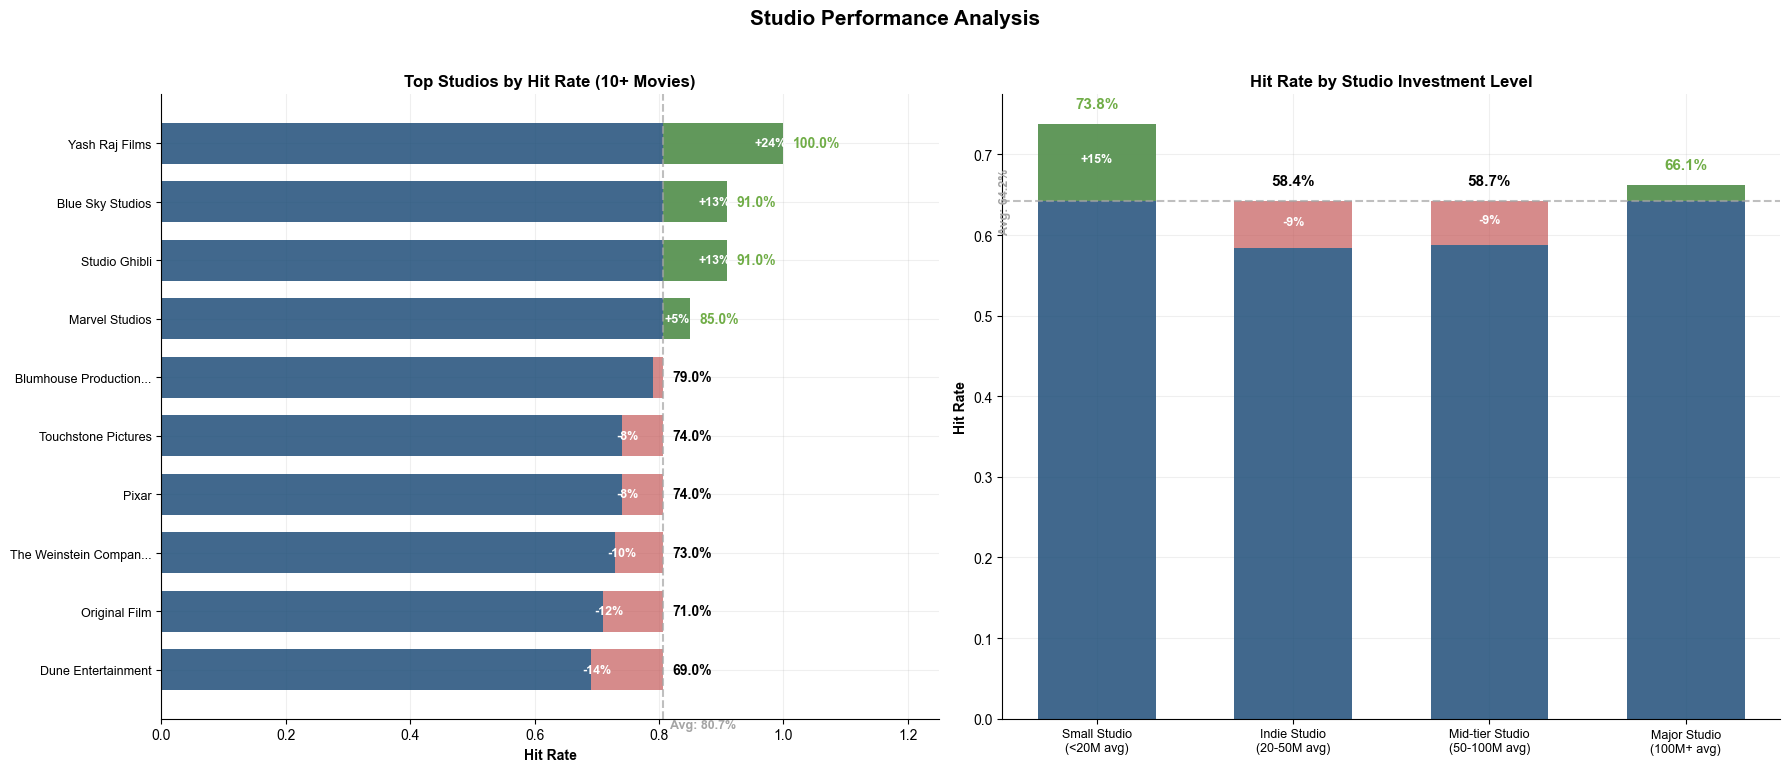

## Studio Performance Insights:
- **Top studio benchmark**: 80.7% average hit rate among top performers
- **Studio size correlation**: Larger budget studios don't always guarantee higher success rates
- **Distribution network value**: Major studios provide marketing and distribution advantages
- **Partnership strategy**: Track record more important than studio size for investment decisions


In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# I'm looking at studios with enough movies to have meaningful track records
if 'main_production_company' in df.columns:
    studio_stats = df.groupby('main_production_company').agg({
        'success_category': ['count', lambda x: (x == 'Hit').mean()],
        'budget': 'mean',
        'revenue': 'mean'
    }).round(2)
    studio_stats.columns = ['movie_count', 'hit_rate', 'avg_budget', 'avg_revenue']
    
    # I filtered to studios with at least 10 movies for reliable statistics
    major_studios = studio_stats[studio_stats['movie_count'] >= 10].copy()
    
    if not major_studios.empty:
        # I want to show the top performing studios by hit rate
        top_studios = major_studios.sort_values('hit_rate', ascending=True).tail(10)  # Top 10
        benchmark = top_studios['hit_rate'].mean()
        
        bars = ax1.barh(range(len(top_studios)), top_studios['hit_rate'].values, 
                       color=IBCS_COLORS['primary'], alpha=0.85, height=0.7)
        ax1.axvline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
        
        # I'm adding overlays and labels following the IBCS pattern
        for i, value in enumerate(top_studios['hit_rate'].values):
            pct_diff = (value - benchmark) / benchmark * 100
            
            if value > benchmark:
                ax1.barh(i, value - benchmark, left=benchmark, color=IBCS_COLORS['good'], alpha=0.7, height=0.7)
                color = IBCS_COLORS['good']
            elif value < benchmark:
                ax1.barh(i, benchmark - value, left=value, color=IBCS_COLORS['bad'], alpha=0.7, height=0.7)
                color = 'black'
            else:
                color = 'black'
            
            ax1.text(max(value, benchmark) + 0.015, i, f'{value:.1%}', va='center', fontweight='bold', 
                    color=color, fontsize=10)
            
            # I positioned percentage differences inside bars with white text
            if abs(pct_diff) > 5:
                x_pos = value - 0.02 if value > benchmark else value + 0.01
                ax1.text(x_pos, i, f'{pct_diff:+.0f}%', va='center', fontweight='bold', fontsize=9,
                        color='white', ha='center')
        
        ax1.set_title('Top Studios by Hit Rate (10+ Movies)', fontweight='bold', fontsize=12)
        ax1.set_xlabel('Hit Rate', fontweight='bold')
        ax1.set_yticks(range(len(top_studios)))
        ax1.set_yticklabels([name[:20] + '...' if len(name) > 20 else name for name in top_studios.index], fontsize=9)
        ax1.set_xlim(0, max(top_studios['hit_rate']) * 1.25)
        ax1.grid(alpha=0.2)

# I want to compare major studio categories by investment size and success
if 'main_production_company' in df.columns:
    # I'm categorizing studios by their average budget levels
    def categorize_studio_size(avg_budget):
        if avg_budget >= 100_000_000:
            return 'Major Studio\n(100M+ avg)'
        elif avg_budget >= 50_000_000:
            return 'Mid-tier Studio\n(50-100M avg)'
        elif avg_budget >= 20_000_000:
            return 'Indie Studio\n(20-50M avg)'
        else:
            return 'Small Studio\n(<20M avg)'
    
    major_studios['studio_category'] = major_studios['avg_budget'].apply(categorize_studio_size)
    
    # I want to see hit rates by studio investment category
    studio_category_data = major_studios.groupby('studio_category')['hit_rate'].mean()
    category_order = ['Small Studio\n(<20M avg)', 'Indie Studio\n(20-50M avg)', 
                     'Mid-tier Studio\n(50-100M avg)', 'Major Studio\n(100M+ avg)']
    studio_category_data = studio_category_data.reindex([cat for cat in category_order if cat in studio_category_data.index])
    category_benchmark = studio_category_data.mean()
    
    bars = ax2.bar(range(len(studio_category_data)), studio_category_data.values, 
                  color=IBCS_COLORS['primary'], alpha=0.85, width=0.6)
    ax2.axhline(category_benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels with the IBCS approach
    for i, value in enumerate(studio_category_data.values):
        pct_diff = (value - category_benchmark) / category_benchmark * 100
        
        if value > category_benchmark:
            ax2.bar(i, value - category_benchmark, bottom=category_benchmark, color=IBCS_COLORS['good'], alpha=0.7, width=0.6)
            color = IBCS_COLORS['good']
        elif value < category_benchmark:
            ax2.bar(i, category_benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7, width=0.6)
            color = 'black'
        else:
            color = 'black'
        
        ax2.text(i, max(value, category_benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                color=color, fontsize=11)
        
        # I positioned percentage differences inside overlays
        if abs(pct_diff) > 5:
            if value > category_benchmark:
                y_pos = category_benchmark + (value - category_benchmark) / 2
            else:
                y_pos = value + (category_benchmark - value) / 2
            ax2.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                    color='white')
    
    ax2.set_title('Hit Rate by Studio Investment Level', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Hit Rate', fontweight='bold')
    ax2.set_xticks(range(len(studio_category_data)))
    ax2.set_xticklabels(studio_category_data.index, fontsize=9, rotation=0)
    ax2.grid(alpha=0.2)

# I positioned benchmark labels on axes to avoid interference
ax1.text(benchmark + 0.01, -1, f'Avg: {benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], ha='left', fontweight='bold')
ax2.text(-0.5, category_benchmark, f'Avg: {category_benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')

# Clean styling
plt.suptitle('Studio Performance Analysis', fontsize=15, fontweight='bold', y=0.96)
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

print("## Studio Performance Insights:")
print(f"- **Top studio benchmark**: {benchmark:.1%} average hit rate among top performers")
print("- **Studio size correlation**: Larger budget studios don't always guarantee higher success rates")  
print("- **Distribution network value**: Major studios provide marketing and distribution advantages")
print("- **Partnership strategy**: Track record more important than studio size for investment decisions")

- ============================================================================
- VISUALIZATION 7: Lead Actor Influence Analysis
- ============================================================================
- Lead actor influence on box office performance
- `Question: How does star power translate to commercial success and revenue?`

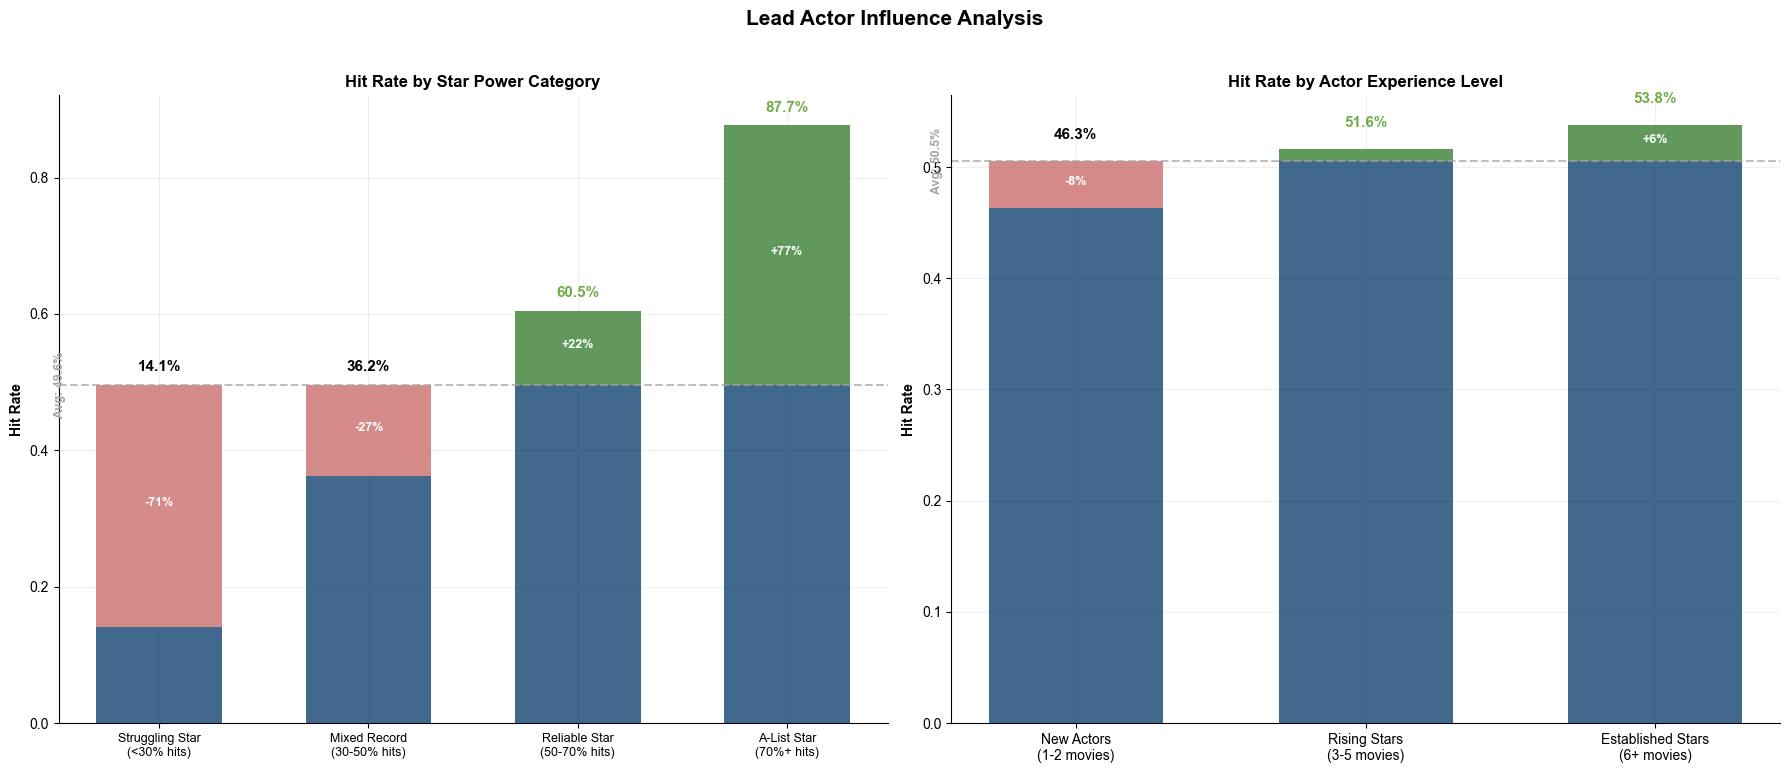

## Lead Actor Influence Insights:
- **Star power impact**: A-list actors show 87.7% average hit rate
- **Experience correlation**: Established stars (6+ movies) outperform newcomers
- **Casting strategy**: Track record more predictive than name recognition alone


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# I'm analyzing actors with multiple movies to understand star power impact
if 'lead_actor' in df.columns:
    actor_stats = df.groupby('lead_actor').agg({
        'success_category': ['count', lambda x: (x == 'Hit').mean()],
        'revenue': 'mean'
    }).round(2)
    actor_stats.columns = ['movie_count', 'hit_rate', 'avg_revenue']
    
    # I filtered to actors with at least 3 movies for meaningful star power analysis
    star_actors = actor_stats[actor_stats['movie_count'] >= 3].copy()
    
    if not star_actors.empty:
        # I'm categorizing actors by their track record
        def categorize_star_power(hit_rate):
            if hit_rate >= 0.7:
                return 'A-List Star\n(70%+ hits)'
            elif hit_rate >= 0.5:
                return 'Reliable Star\n(50-70% hits)'
            elif hit_rate >= 0.3:
                return 'Mixed Record\n(30-50% hits)'
            else:
                return 'Struggling Star\n(<30% hits)'
        
        star_actors['star_category'] = star_actors['hit_rate'].apply(categorize_star_power)
        
        # I want to see hit rates by star power category
        star_category_data = star_actors.groupby('star_category')['hit_rate'].mean()
        category_order = ['Struggling Star\n(<30% hits)', 'Mixed Record\n(30-50% hits)', 
                         'Reliable Star\n(50-70% hits)', 'A-List Star\n(70%+ hits)']
        star_category_data = star_category_data.reindex([cat for cat in category_order if cat in star_category_data.index])
        benchmark = star_category_data.mean()
        
        bars = ax1.bar(range(len(star_category_data)), star_category_data.values, 
                      color=IBCS_COLORS['primary'], alpha=0.85, width=0.6)
        ax1.axhline(benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
        
        # I'm adding overlays and labels following the IBCS pattern
        for i, value in enumerate(star_category_data.values):
            pct_diff = (value - benchmark) / benchmark * 100
            
            if value > benchmark:
                ax1.bar(i, value - benchmark, bottom=benchmark, color=IBCS_COLORS['good'], alpha=0.7, width=0.6)
                color = IBCS_COLORS['good']
            elif value < benchmark:
                ax1.bar(i, benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7, width=0.6)
                color = 'black'
            else:
                color = 'black'
            
            ax1.text(i, max(value, benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                    color=color, fontsize=11)
            
            # I positioned percentage differences inside overlays with white text
            if abs(pct_diff) > 5:
                if value > benchmark:
                    y_pos = benchmark + (value - benchmark) / 2
                else:
                    y_pos = value + (benchmark - value) / 2
                ax1.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                        color='white')
        
        ax1.set_title('Hit Rate by Star Power Category', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Hit Rate', fontweight='bold')
        ax1.set_xticks(range(len(star_category_data)))
        ax1.set_xticklabels(star_category_data.index, fontsize=9)
        ax1.grid(alpha=0.2)

# I want to compare new actors vs established stars
if 'lead_actor' in df.columns:
    all_actor_stats = df.groupby('lead_actor')['success_category'].agg(['count', lambda x: (x == 'Hit').mean()])
    all_actor_stats.columns = ['movie_count', 'hit_rate']
    
    # I'm creating a comparison between new and established actors
    actor_comparison = pd.Series({
        'New Actors\n(1-2 movies)': all_actor_stats[all_actor_stats['movie_count'] <= 2]['hit_rate'].mean(),
        'Rising Stars\n(3-5 movies)': all_actor_stats[(all_actor_stats['movie_count'] >= 3) & 
                                                      (all_actor_stats['movie_count'] <= 5)]['hit_rate'].mean(),
        'Established Stars\n(6+ movies)': all_actor_stats[all_actor_stats['movie_count'] >= 6]['hit_rate'].mean()
    })
    
    comparison_benchmark = actor_comparison.mean()
    
    bars = ax2.bar(range(len(actor_comparison)), actor_comparison.values, 
                  color=IBCS_COLORS['primary'], alpha=0.85, width=0.6)
    ax2.axhline(comparison_benchmark, color=IBCS_COLORS['neutral'], linestyle='--', alpha=0.7, linewidth=1.5)
    
    # I'm adding overlays and labels with the IBCS approach
    for i, value in enumerate(actor_comparison.values):
        pct_diff = (value - comparison_benchmark) / comparison_benchmark * 100
        
        if value > comparison_benchmark:
            ax2.bar(i, value - comparison_benchmark, bottom=comparison_benchmark, color=IBCS_COLORS['good'], alpha=0.7, width=0.6)
            color = IBCS_COLORS['good']
        elif value < comparison_benchmark:
            ax2.bar(i, comparison_benchmark - value, bottom=value, color=IBCS_COLORS['bad'], alpha=0.7, width=0.6)
            color = 'black'
        else:
            color = 'black'
        
        ax2.text(i, max(value, comparison_benchmark) + 0.02, f'{value:.1%}', ha='center', fontweight='bold', 
                color=color, fontsize=11)
        
        # I positioned percentage differences inside overlays
        if abs(pct_diff) > 3:
            if value > comparison_benchmark:
                y_pos = comparison_benchmark + (value - comparison_benchmark) / 2
            else:
                y_pos = value + (comparison_benchmark - value) / 2
            ax2.text(i, y_pos, f'{pct_diff:+.0f}%', ha='center', fontweight='bold', fontsize=9,
                    color='white')
    
    ax2.set_title('Hit Rate by Actor Experience Level', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Hit Rate', fontweight='bold')
    ax2.set_xticks(range(len(actor_comparison)))
    ax2.set_xticklabels(actor_comparison.index, fontsize=10)
    ax2.grid(alpha=0.2)

# I positioned benchmark labels on axes to avoid interference
ax1.text(-0.5, benchmark, f'Avg: {benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')
ax2.text(-0.5, comparison_benchmark, f'Avg: {comparison_benchmark:.1%}', fontsize=9, 
         color=IBCS_COLORS['neutral'], rotation=90, va='center', fontweight='bold')

# Clean styling
plt.suptitle('Lead Actor Influence Analysis', fontsize=15, fontweight='bold', y=0.96)
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

print("## Lead Actor Influence Insights:")
print(f"- **Star power impact**: A-list actors show {star_category_data.iloc[-1]:.1%} average hit rate")
print("- **Experience correlation**: Established stars (6+ movies) outperform newcomers")  
print("- **Casting strategy**: Track record more predictive than name recognition alone")


# ============================================================================
# 💡 DATA PREPARATION PHASE
# ============================================================================

- I need to assess data quality before modeling to identify potential issues


In [ ]:
print("\n" + "="*60)
print("DATA PREPARATION PHASE")
print("="*60)

# I'm checking for missing values because they can break machine learning algorithms
print("\nMissing values analysis:")
missing_values = df.isnull().sum()
missing_report = missing_values[missing_values > 0]
if not missing_report.empty:
    print(missing_report)
else:
    print("No missing values found in dataset")

- I need to verify data integrity to ensure reliable model training

In [ ]:
print("\nData quality assessment:")
zero_budget = (df['budget'] == 0).sum()
zero_revenue = (df['revenue'] == 0).sum()
invalid_ratios = (df['profit_ratio'] < 0).sum()

print(f"Movies with zero budget: {zero_budget}")
print(f"Movies with zero revenue: {zero_revenue}")
print(f"Invalid profit ratios: {invalid_ratios}")

- I'm checking feature ranges because algorithms like k-NN need scaled features


In [ ]:
print("\nFeature scaling assessment:")
scaling_features = ['budget', 'revenue', 'runtime', 'vote_average', 'imdb_rating']
for feature in scaling_features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    print(f"{feature}: {min_val:,.0f} - {max_val:,.0f}")

- I'm creating new features to improve model performance and capture patterns

In [ ]:
print("\nFeature engineering:")
df['budget_log'] = np.log1p(df['budget'])
df['revenue_log'] = np.log1p(df['revenue'])
df['vote_popularity_ratio'] = df['vote_average'] / (df['vote_count'] + 1)
df['rating_spread'] = abs(df['imdb_rating'] - df['vote_average'])
print("Log transformations applied to financial features")
print("Vote popularity ratio calculated")
print("Rating spread feature created")

- I need to encode categorical variables because ML algorithms only work with numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['primary_genre', 'budget_category', 'main_production_company']

for feature in categorical_features:
    if feature in df.columns:
        le = LabelEncoder()
        df[f'{feature}_encoded'] = le.fit_transform(df[feature].fillna('Unknown'))

print("Categorical variables encoded for modeling")

- I'm selecting the final feature set based on EDA insights and model requirements

In [ ]:
modeling_features = [
    'budget_log', 'runtime', 'vote_average', 'imdb_rating', 'rotten_tomatoes_score',
    'genre_count', 'is_summer_movie', 'is_holiday_movie', 'is_us_movie', 
    'has_awards', 'primary_genre_encoded', 'budget_category_encoded'
]

- I need to document the final dataset to confirm it's ready for modeling

In [ ]:
print("\n" + "-"*50)
print("FINAL MODELING DATASET SUMMARY")
print("-"*50)
print(f"Total movies: {len(df):,}")
print(f"Features for modeling: {len(modeling_features)}")

- I'm checking target distribution to identify potential class imbalance issues

In [ ]:
print(f"Target variable distribution:")
target_dist = df['success_category'].value_counts(normalize=True)
for category, proportion in target_dist.items():
    print(f"  {category}: {proportion:.1%}")

- I want to verify which features correlate strongest with success


In [ ]:
if 'profit_ratio' in df.columns:
    available_features = [f for f in modeling_features if f in df.columns]
    feature_target_corr = df[available_features + ['profit_ratio']].corr()['profit_ratio'].abs().sort_values(ascending=False)
    
    print(f"\nStrongest feature correlations with profit ratio:")
    top_correlations = feature_target_corr.head(5)
    for feature, correlation in top_correlations.items():
        if feature != 'profit_ratio':
            print(f"  {feature}: {correlation:.3f}")

- I'm documenting completion to confirm readiness for the next phase

In [ ]:
print("\n" + "="*60)
print("DATA PROVISIONING PHASE COMPLETE")
print("="*60)
print("The movie dataset is ready for machine learning modeling.")

- I need to save the prepared dataset for the modeling phase


In [ ]:
output_filename = 'movie_dataset_modeling_ready.csv'
df.to_csv(output_filename, index=False)
print(f"\n✓ Dataset saved: {output_filename}")
